# Robust environmental optima

Robust ecological optimum is calculated for a genome (or a gene), which reflects the optimal living condition regarding a given environmental parameter and a tolerance range around this optimum defined by lower and upper bounds.

Citation:

> Meng, Lingjie, Tom O. Delmont, Morgan Gaia, Eric Pelletier, Antonio Fernandez-Guerra, Samuel Chaffron, Russell Y. Neches et al. "Genomic adaptation of giant viruses in polar oceans." bioRxiv (2023): 2023-02.

In [1]:
import pandas as pd
import numpy as np
import seaborn

In [2]:
# Load the RPKM and metadata
RPKMdata = pd.read_csv("RPKM.csv", sep=",")
metadata = pd.read_csv("metadata.csv", sep=",")

envname = "Temperature"
outfile = f"{envname}_optimum_tolerance.csv"

In [3]:
# Generate a list of headers in RPKMdata
headerlist = [col for col in RPKMdata.columns]

result = []

for i in headerlist[1:]:
    # Generate a weighted vector (list)
    n10000list = []
    total = 0
    nona = 0

    # Count the nonNA in environmental variables and nonZero RPKM
    for n in range(len(RPKMdata)):
        if RPKMdata[i][n] > 0:
            total += 1
            # If corresponding metadata is not 'NA', increase nona count
            if metadata[envname][n] != "NA":
                nona += 1

    # minimum 10 non-NA observations and at least 30% non-NA
    if (nona >= 10) and (nona >= 0.3*total):
        for n in range(len(RPKMdata)):
            if RPKMdata[i][n] > 0:
                if metadata[envname][n] != "NA":
                    # Calculate the weight (number of repeats) in the 10,000 vector
                    weight = int(round(10000 * (RPKMdata[i][n]/sum(RPKMdata[i]))))
                    # Adding a certain number of repeated values (N = weight) to the list n10000list. 
                    n10000list.extend([metadata[envname][n]] * weight)

        # Compute statistics
        min_val = min(n10000list)
        q1 = np.nanpercentile(n10000list, 25, method='midpoint')
        median = np.nanpercentile(n10000list, 50, method='midpoint')
        q3 = np.nanpercentile(n10000list, 75, method='midpoint')
        max_val = max(n10000list)
        tolerance = q3 - q1
        data = {
            'Genome'         : i,
            'Minimum'        : min_val,
            'Q1'             : q1,
            'Median_Optimum' : median,
            'Q3'             : q3,
            'Maximum'        : max_val,
            'Tolerance'      : tolerance,
            'Num_NonNA'      : nona,
            'Total'          :total
        }
    else:
        # If criteria are not met, write 'NA' for all calculated fields
        data = {
            'Genome'         : i,
            'Num_NonNA'      : nona,
            'Total'          : total
        }
    result.append(data)

output = pd.DataFrame( result )
# Write results to output file
output.to_csv(outfile, index = False)
output

,Genome,Minimum,Q1,Median_Optimum,Q3,Maximum,Tolerance,Num_NonNA,Total
0,TARA_SOC_NCLDV_00026,-1.680906,-1.649738,-1.531360,1.488850,8.474470,3.138588,95,95
1,Schulz_GVMAG_S_1102104_120,-1.680906,-1.680906,-1.649738,-1.531360,19.781235,0.149546,64,64
2,Schulz_GVMAG_S_1102114_126,-1.680906,-1.649738,-1.531360,1.457935,5.295265,3.107673,60,60
3,TARA_ARC_NCLDV_00127,-1.297850,6.734890,6.734890,8.474470,15.014000,1.739580,33,33
4,Schulz_GVMAG_M_3300025652_16,-1.680906,3.196500,6.734890,7.579417,24.482800,4.382917,94,94
...,...,...,...,...,...,...,...,...,...
95,TARA_AON_NCLDV_00020,13.993715,17.585567,20.150733,20.481195,26.605515,2.895628,39,39
96,Schulz_GVMAG_S_1102238_66,-1.297850,1.488850,1.488850,1.488850,7.487660,0.000000,28,28
97,TARA_PON_NCLDV_00028,13.066005,13.874505,16.863680,26.139288,27.956100,12.264783,54,54
98,Moniruzzaman_LP01_SRX802076_50_dc,7.481658,14.319160,14.319160,17.627142,26.317294,3.307982,35,35


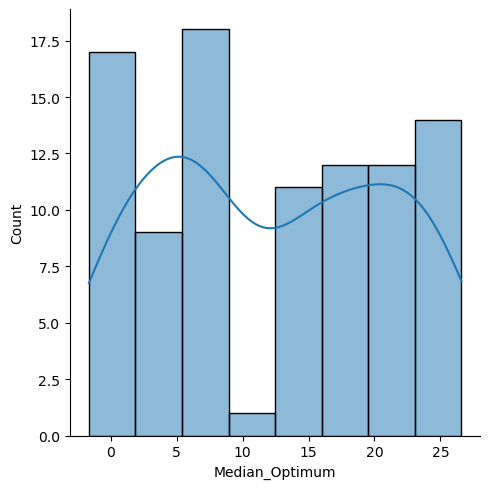

In [4]:
seaborn.displot(data=output, x="Median_Optimum", kde=True)